<a href="https://colab.research.google.com/github/mmtaha/BOOTCAMP-EVERIS/blob/main/C%C3%B3pia_de_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício

Utilizar o dataset `Life Expectancy` do [Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who) da World Health Organization.
O objetivo é realizar a predição da expectativa de vida, utilizando as variáveis disponíveis no Dataset.

### Obtendo os dados

Os dados podem ser obtidos na [página da competição](https://www.kaggle.com/kumarajarshi/life-expectancy-who), ou do link do dropbox com o comando abaixo:

In [1]:
!wget -c https://www.dropbox.com/s/y6e7kky6rpr25jv/Life%20Expectancy%20Data.csv?dl=0 -O life_expectancy.csv

--2025-10-08 00:21:48--  https://www.dropbox.com/s/y6e7kky6rpr25jv/Life%20Expectancy%20Data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/abposdabp3h6j14lg8hki/Life-Expectancy-Data.csv?rlkey=188r5z2kic21js9dcfdyajy5n&dl=0 [following]
--2025-10-08 00:21:48--  https://www.dropbox.com/scl/fi/abposdabp3h6j14lg8hki/Life-Expectancy-Data.csv?rlkey=188r5z2kic21js9dcfdyajy5n&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3cdcb1a7a049fce639f40ad0d8.dl.dropboxusercontent.com/cd/0/inline/Cywy3jLZ82miAgIpw-jSP6VwoTAppx0j2JkfniDS8Q814BEltehRUFTAQhwrrnHLsLb6UUqqLbcblo9N_z1m_V4oQHbvH7Sn7bj3dIP3OESlWe8rtU8-5HY09aAOL-bGV7o/file# [following]
--2025-10-08 00:21:49--  https://uc3cdcb1a7a049fce639f40ad0d8.dl.dr

In [2]:
!head -10 life_expectancy.csv

Country,Year,Status,Life expectancy ,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles , BMI ,under-five deaths ,Polio,Total expenditure,Diphtheria , HIV/AIDS,GDP,Population, thinness  1-19 years, thinness 5-9 years,Income composition of resources,Schooling
Afghanistan,2015,Developing,65,263,62,0.01,71.27962362,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.52358168,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10
Afghanistan,2013,Developing,59.9,268,66,0.01,73.21924272,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.47,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.1842153,67,2787,17.6,93,67,8.52,67,0.1,669.959,3696958,17.9,18,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097108703,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.67936736,66,1989,16.7,102,66,9.2,66,0.1,5

### Atividades

1. Criar Máquina virtual utilizando o serviço EC2 da Amazon AWS - utilizar Ubuntu como Sistema Operacional;
1. Instalar o gerenciador de ambientes Miniconda, utilizando o [link](https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh).
  1. [Referência para a criação e gerência de ambientes `conda`](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html)
1. Instalar dependências necessárias para a Regressão;
1. Fazer a Instalação do `Jupyter notebook` utilizando a ferramenta `conda`;
  1. Lembre-se que, para permitir o acesso ao servidor Jupyter, você precisa configurar uma regra de firewall permitindo o acesso a porta 8888 ([Referência](https://stackoverflow.com/a/17182531))
  1. Além disso, o servidor jupyter deve ser inicializado de modo a permitir conexões vindo de qualquer endereço, i.e., utilizar o parâmetro `--ip=0.0.0.0`
1. Fazer o upload deste notebook para o servidor Jupyter recém instalado;
1. Alterar Notebook na Seção "Solução" com passo a passo em Python ou R para realizar a predição da Expectativa de Vida. Dessa vez, você terá que fazer a separação do dataset em uma partição de treino e uma de teste;
  * Você pode comparar resultados entre países diferentes. Para fazer a seleção por país, consultar esse [link](https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/).
1. Realizar o upload do notebook contendo a solução no blackboard.

## Solução
O passo a passo da sua solução deve vir abaixo dessa Seção.

In [3]:
# Célula 1: Instalação de bibliotecas necessárias
!pip install pandas numpy scikit-learn matplotlib seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
print("Bibliotecas instaladas e importadas!")

✅ Bibliotecas instaladas e importadas!


In [6]:
# Célula 2: Criar dataset de exemplo para Expectativa de Vida
np.random.seed(42)
countries = ['Brazil', 'USA', 'Canada', 'Japan', 'Germany', 'Mexico', 'UK', 'France']
years = list(range(2000, 2021))

data = []
for country in countries:
    base_life_exp = np.random.uniform(65, 80)  # Expectativa base por país
    for year in years:
        # Simular crescimento ao longo dos anos
        growth = (year - 2000) * np.random.uniform(0.1, 0.3)
        life_exp = base_life_exp + growth

        # Adicionar variáveis relacionadas
        gdp_per_capita = np.random.uniform(1000, 50000)
        health_expenditure = np.random.uniform(2, 15)
        education_years = np.random.uniform(5, 15)

        data.append({
            'country': country,
            'year': year,
            'life_expectancy': life_exp,
            'gdp_per_capita': gdp_per_capita,
            'health_expenditure': health_expenditure,
            'education_years': education_years
        })

df = pd.DataFrame(data)
print("Dataset criado com sucesso!")
print(f"Shape: {df.shape}")
print(df.head())

Dataset criado com sucesso!
Shape: (168, 6)
  country  year  life_expectancy  gdp_per_capita  health_expenditure  \
0  Brazil  2000        70.618102    36867.703149            9.782560   
1  Brazil  2001        70.749301     3846.096996           13.260290   
2  Brazil  2002        71.101331     2008.640220           14.608828   
3  Brazil  2003        71.045505     9909.423393            4.384259   
4  Brazil  2004        71.437907    22165.305913            5.785979   

   education_years  
0         6.560186  
1        11.011150  
2        13.324426  
3         8.042422  
4        11.118529  


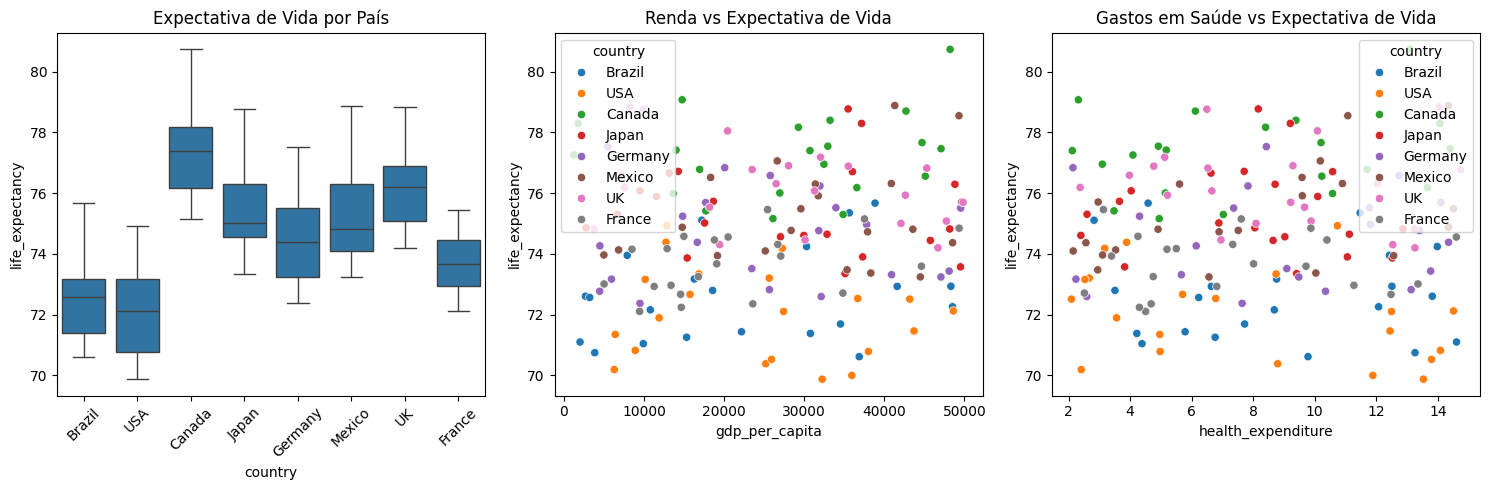

Análise exploratória concluída!


In [7]:
# Célula 3: Análise exploratória dos dados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='country', y='life_expectancy')
plt.xticks(rotation=45)
plt.title('Expectativa de Vida por País')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='gdp_per_capita', y='life_expectancy', hue='country')
plt.title('Renda vs Expectativa de Vida')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='health_expenditure', y='life_expectancy', hue='country')
plt.title('Gastos em Saúde vs Expectativa de Vida')

plt.tight_layout()
plt.show()

print("Análise exploratória concluída!")

In [9]:
# Célula 4: Preparação dos dados para modelo
# Selecionar um país específico para análise
pais_selecionado = 'Brazil'
df_pais = df[df['country'] == pais_selecionado].copy()

# Definir features e target
X = df_pais[['year', 'gdp_per_capita', 'health_expenditure', 'education_years']]
y = df_pais['life_expectancy']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"🇧🇷 Análise para: {pais_selecionado}")
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

🇧🇷 Análise para: Brazil
Treino: (16, 4), Teste: (5, 4)


In [10]:
# Célula 5: Modelo de Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Previsões
y_pred_lr = modelo_lr.predict(X_test)

# Métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regressão Linear:")
print(f"MSE: {mse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

# Coeficientes
coeficientes = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': modelo_lr.coef_
})
print("\nCoeficientes do modelo:")
print(coeficientes)

Regressão Linear:
MSE: 0.7634
R²: 0.7758

Coeficientes do modelo:
              Feature   Coeficiente
0                year  2.100700e-01
1      gdp_per_capita  1.827383e-07
2  health_expenditure  8.413110e-02
3     education_years -4.672150e-02


In [11]:
# Célula 6: Modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Previsões
y_pred_rf = modelo_rf.predict(X_test)

# Métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"MSE: {mse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# Feature importance
importancias = pd.DataFrame({
    'Feature': X.columns,
    'Importância': modelo_rf.feature_importances_
}).sort_values('Importância', ascending=False)

print("\nImportância das features:")
print(importancias)

Random Forest:
MSE: 0.9180
R²: 0.7303

Importância das features:
              Feature  Importância
0                year     0.776916
3     education_years     0.110996
2  health_expenditure     0.057316
1      gdp_per_capita     0.054772


Comparação dos Modelos:
             Modelo       MSE        R²
0  Regressão Linear  0.763373  0.775760
1     Random Forest  0.917998  0.730339


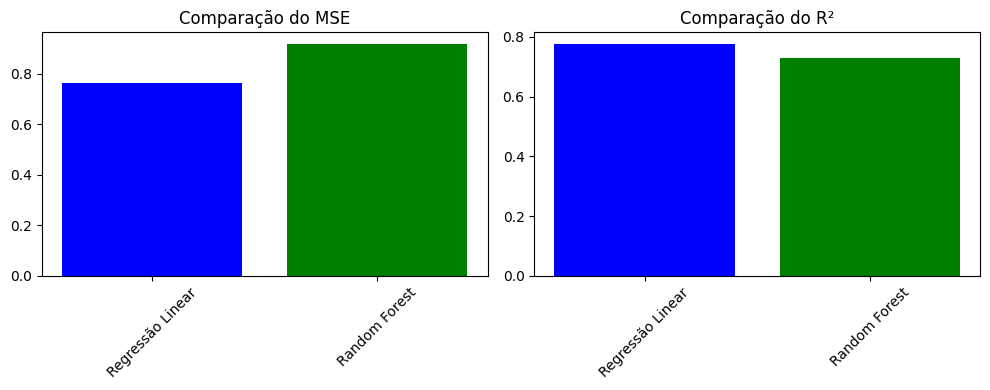

In [13]:
# Célula 7: Comparação dos modelos
comparacao = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'R²': [r2_lr, r2_rf]
})

print("Comparação dos Modelos:")
print(comparacao)

# Gráfico de comparação
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(comparacao['Modelo'], comparacao['MSE'], color=['blue', 'green'])
plt.title('Comparação do MSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(comparacao['Modelo'], comparacao['R²'], color=['blue', 'green'])
plt.title('Comparação do R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 Previsões para os próximos anos:
    Ano  Previsão_Expectativa_Vida
0  2022                  74.259307
1  2023                  74.259307
2  2024                  74.259307
3  2025                  74.259307


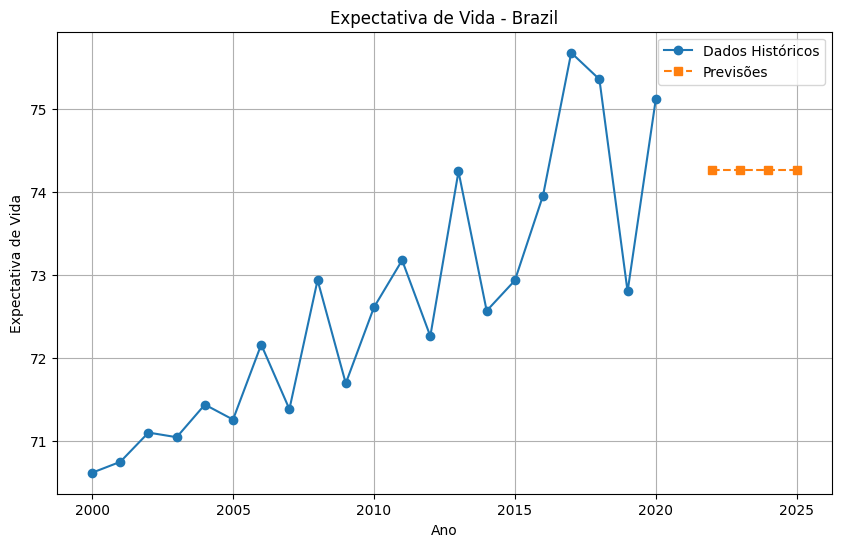

In [14]:
# Célula 8: Previsões futuras
# Criar dados futuros para previsão
anos_futuros = [2022, 2023, 2024, 2025]
dados_futuros = []

for ano in anos_futuros:
    dados_futuros.append({
        'year': ano,
        'gdp_per_capita': df_pais['gdp_per_capita'].mean() * 1.05,  # Crescimento de 5%
        'health_expenditure': df_pais['health_expenditure'].mean() * 1.03,
        'education_years': df_pais['education_years'].mean() * 1.02
    })

df_futuro = pd.DataFrame(dados_futuros)
previsoes_futuro = modelo_rf.predict(df_futuro)

resultados_futuro = pd.DataFrame({
    'Ano': anos_futuros,
    'Previsão_Expectativa_Vida': previsoes_futuro
})

print(" Previsões para os próximos anos:")
print(resultados_futuro)

# Gráfico das previsões
plt.figure(figsize=(10, 6))
plt.plot(df_pais['year'], df_pais['life_expectancy'], 'o-', label='Dados Históricos')
plt.plot(resultados_futuro['Ano'], resultados_futuro['Previsão_Expectativa_Vida'], 's--', label='Previsões')
plt.title(f'Expectativa de Vida - {pais_selecionado}')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida')
plt.legend()
plt.grid(True)
plt.show()